# Data generation for logistic regression



In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.special import expit

np.random.seed(42)

n = 100
works = norm(40, 5).rvs(n)
prob_hired = expit(-80 + 2*works)
hired = bernoulli(prob_hired).rvs(n)

interns = pd.DataFrame({"work": works.round(1),
                        "hired": hired})

interns.to_csv("../datasets/interns.csv", index=False)

In [3]:
interns = pd.read_csv("../datasets/interns.csv")
interns.head(3)

,work,hired
0,42.5,1
1,39.3,0
2,43.2,1


In [4]:
import statsmodels.formula.api as smf

lr1 = smf.logit("hired ~ 1 + work", data=interns).fit()
print(lr1.params)

Optimization terminated successfully.
         Current function value: 0.138101
         Iterations 10
Intercept   -78.693205
work          1.981458
dtype: float64


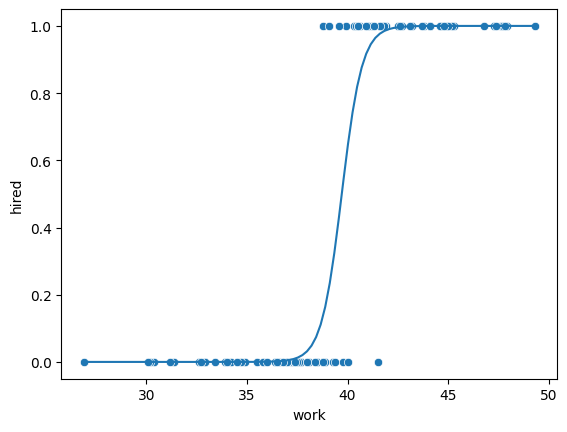

In [5]:
from ministats import plot_reg
plot_reg(lr1);